In [28]:
!pip install plotly

In [29]:
import statsmodels.api as sm
import time

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import math
from statsmodels.formula.api import ols
from datetime import datetime
from geopy.geocoders import Nominatim
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import pingouin
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [30]:
clf = linear_model.LinearRegression()


In [31]:
# get training

df = pd.read_csv('data/clean/zhome_value.csv')
df["year"] = pd.to_datetime(df.year.astype(str)).dt.year

# Split by before and after 2015 

In [32]:
home_value_df = df

In [33]:
home_value_df = home_value_df.groupby('year').mean().reset_index()
home_value_df

C:\Users\pumah\AppData\Local\Temp\ipykernel_23708\1271320138.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_value_df = home_value_df.groupby('year').mean().reset_index()


,year,zipcode,home_value
0,2002,10844.331078,388185.197814
1,2003,10859.201878,427488.437141
2,2004,10847.042683,475856.334858
3,2005,10847.042683,563629.120427
4,2006,10833.730055,640005.374812
5,2007,10836.500000,642873.288725
6,2008,10835.700784,645294.235553
7,2009,10818.026807,611269.790330
8,2010,10813.988571,580224.588095
9,2011,10810.965909,595607.424716


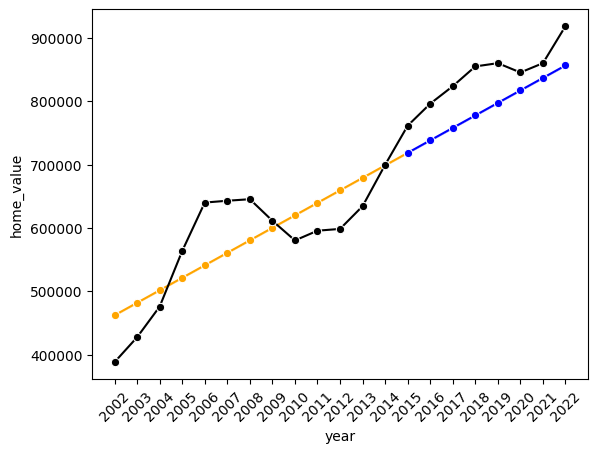

In [34]:
# Split at 2015

post_airbnb_df = df[df["year"] >= 2015].sort_values(by="year", ascending=True)
pre_airbnb_df = df[df["year"] <= 2015].sort_values(by="year", ascending=True)

y_train, x_train = pre_airbnb_df["home_value"], pre_airbnb_df["year"].array.reshape(-1, 1)
y_test, x_test = post_airbnb_df["home_value"], post_airbnb_df["year"].array.reshape(-1, 1)

clf.fit(x_train, y_train)

home_value_year = home_value_df["year"]

sns.lineplot(x=x_train.reshape(clf.predict(x_train).shape), y=list(clf.predict(x_train)), color='orange', marker='o')
sns.lineplot(y=home_value_df["home_value"], x=home_value_year, color='black', marker='o')
sns.lineplot(x=x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')

# X label formatting
plt.xticks(range(math.floor(min(home_value_year)), math.ceil(max(home_value_year))+1))
plt.xticks(rotation=45)
# Add title, legend 
print()
# todo: fix weird x-axis

# Use this for the results 


<AxesSubplot: xlabel='year', ylabel='home_value'>

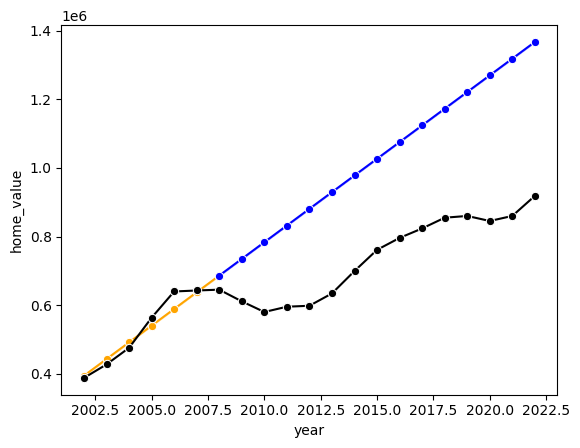

In [35]:
# Split at 2008

post_airbnb_df = df[df["year"] >= 2008].sort_values(by="year", ascending=True)
pre_airbnb_df = df[df["year"] <= 2008].sort_values(by="year", ascending=True)

y_train, x_train = pre_airbnb_df["home_value"], pre_airbnb_df["year"].array.reshape(-1, 1)
y_test, x_test = post_airbnb_df["home_value"], post_airbnb_df["year"].array.reshape(-1, 1)

clf.fit(x_train, y_train)

sns.lineplot(x = x_train.reshape(clf.predict(x_train).shape), y=list(clf.predict(x_train)), color='orange', marker='o')
sns.lineplot(y = home_value_df["home_value"], x= home_value_df["year"], color='black', marker='o')
sns.lineplot(x = x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')


### DO NOT USE THIS ONE...


In [36]:
# Add line points to a data frame 

orange_line = {
    'y': list(clf.predict(x_train)),
    'x': x_train.reshape(clf.predict(x_train).shape),
        }

blue_line = {
    'y': list(clf.predict(x_test)),
    'x': x_test.reshape(clf.predict(x_test).shape),
        }

black_line = {
    "x": home_value_df["year"], 
    "black_y": home_value_df["home_value"]
}

# Create DataFrame
orange_line_df = pd.DataFrame(orange_line).drop_duplicates(ignore_index=True)
blue_line_df = pd.DataFrame(blue_line).drop_duplicates(ignore_index=True)
black_line_df = pd.DataFrame(black_line).drop_duplicates(ignore_index=True)

orange_line_df["x"] = pd.to_datetime(orange_line_df.x.astype(str)).dt.year
blue_line_df["x"] = pd.to_datetime(blue_line_df.x.astype(str)).dt.year
black_line_df["x"] = pd.to_datetime(black_line_df.x.astype(str)).dt.year


display(orange_line_df.head())
display(blue_line_df.head())
display(black_line_df.head())

# combine blue and orange into one line 

orange_and_blue_df = pd.concat([orange_line_df, blue_line_df])


,y,x
0,394594.147508,2002
1,443214.502079,2003
2,491834.856650,2004
3,540455.211221,2005
4,589075.565792,2006


,y,x
0,686316.274934,2008
1,734936.629505,2009
2,783556.984076,2010
3,832177.338647,2011
4,880797.693218,2012


,x,black_y
0,2002,388185.197814
1,2003,427488.437141
2,2004,475856.334858
3,2005,563629.120427
4,2006,640005.374812


In [37]:
plot_df = pd.merge(orange_and_blue_df, black_line_df, on='x')
plot_df["diff"] = plot_df["y"] - plot_df["black_y"] 
plot_df

,y,x,black_y,diff
0,3.945941e+05,2002,388185.197814,6408.949695
1,4.432145e+05,2003,427488.437141,15726.064938
2,4.918349e+05,2004,475856.334858,15978.521793
3,5.404552e+05,2005,563629.120427,-23173.909206
4,5.890756e+05,2006,640005.374812,-50929.809020
5,6.376959e+05,2007,642873.288725,-5177.368362
6,6.863163e+05,2008,645294.235553,41022.039381
7,6.863163e+05,2008,645294.235553,41022.039381
8,7.349366e+05,2009,611269.790330,123666.839175
9,7.835570e+05,2010,580224.588095,203332.395981
